<a href="https://colab.research.google.com/github/eungam/NYC-restaurant-inspections/blob/master/Copy_of_Final_Project_Restaurant_Grades_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries needed
import pandas as pd 
import seaborn as sb
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dataset = pd.read_excel('/content/drive/My Drive/jedha fundies/Data/100k lines_Data NYC restaurants.xlsx')

In [ ]:
dataset.head()

,ÔªøCAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50070206,BLUE CAFE RESTAURANT & BAR,Queens,8263,BROADWAY,11373.0,7183960717,Spanish,2018-11-01 00:00:00,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140¬∫ F.,Y,14.0,NaN,NaN,07/20/2020,Pre-permit (Operational) / Initial Inspection,40.741920,-73.881125,404.0,25.0,27100.0,4037524.0,4.015180e+09,QN29
1,41713504,ISIS RESTAURANT,Bronx,739,ALLERTON AVENUE,10467.0,7183241054,Mexican,2019-09-10 00:00:00,Establishment Closed by DOHMH. Violations wer...,08A,Facility not vermin proof. Harborage or condit...,N,40.0,NaN,NaN,07/20/2020,Cycle Inspection / Initial Inspection,40.865466,-73.865700,211.0,15.0,33800.0,2053637.0,2.045100e+09,BX07
2,41674628,MANHATTAN PROPER,Manhattan,6,MURRAY STREET,10007.0,6465594445,American,02/26/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,20.0,B,02/26/2019,07/20/2020,Cycle Inspection / Re-inspection,40.713222,-74.007622,101.0,1.0,2100.0,1001407.0,1.001240e+09,MN24
3,50012117,ROBERTA'S PIZZA & BAKERY,Brooklyn,261,MOORE STREET,11206.0,7184171118,Pizza,2019-01-05 00:00:00,No violations were recorded at the time of thi...,NaN,NaN,NaN,0.0,NaN,NaN,07/20/2020,Inter-Agency Task Force / Initial Inspection,40.704818,-73.934015,301.0,34.0,48500.0,3071483.0,3.031010e+09,BK78
4,41022489,LA CANOA,Queens,651,ONDERDONK AVENUE,11385.0,7184566011,"Latin (Cuban, Dominican, Puerto Rican, South &...",02/24/2020,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,24.0,NaN,NaN,07/20/2020,Cycle Inspection / Initial Inspection,40.704525,-73.908126,405.0,34.0,54700.0,4082889.0,4.034670e+09,QN20


In [ ]:
# cleaning the dataframe
# renaming columns
# deleting useless columns

dataset = dataset.rename(
    columns={
        "ÔªøCAMIS": "Restaurant ID",
        "DBA": "Restaurant Name"
            })

dataset = dataset.drop(["BUILDING", "PHONE", "Community Board", "Council District", "Census Tract", "BIN", "BBL", "NTA"], axis=1)

In [ ]:
dataset.head(1)

,Restaurant ID,Restaurant Name,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
0,50070206,BLUE CAFE RESTAURANT & BAR,Queens,BROADWAY,11373.0,Spanish,2018-11-01 00:00:00,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140¬∫ F.,Y,14.0,NaN,NaN,07/20/2020,Pre-permit (Operational) / Initial Inspection,40.74192,-73.881125


In [ ]:
dataset.isnull().sum()
# we will remove rows with no score (grade is based on score, so we need it for this project)

Restaurant ID                0
Restaurant Name            136
BORO                         0
STREET                      30
ZIPCODE                   2527
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                     682
VIOLATION CODE            2309
VIOLATION DESCRIPTION     3585
CRITICAL FLAG             3585
SCORE                     6502
GRADE                    74275
GRADE DATE               75242
RECORD DATE                  0
INSPECTION TYPE            682
Latitude                   603
Longitude                  603
dtype: int64

In [ ]:
# removing rows with no score
dataset = dataset.dropna(subset=['SCORE'])

# checking
dataset.isnull().sum()

Restaurant ID                0
Restaurant Name              0
BORO                         0
STREET                      29
ZIPCODE                   2405
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             618
VIOLATION DESCRIPTION     1024
CRITICAL FLAG             1024
SCORE                        0
GRADE                    67776
GRADE DATE               68740
RECORD DATE                  0
INSPECTION TYPE              0
Latitude                   590
Longitude                  590
dtype: int64

In [ ]:
# turn qualitative values into quantitative
# starting with boro
newdummies = pd.get_dummies(dataset['BORO'], drop_first=True)
newdummies.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0


In [ ]:
dataset = dataset.merge(newdummies, left_index=True, right_index=True)
dataset.head()

,Restaurant ID,Restaurant Name,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,50070206,BLUE CAFE RESTAURANT & BAR,Queens,BROADWAY,11373.0,Spanish,2018-11-01 00:00:00,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140¬∫ F.,Y,14.0,NaN,NaN,07/20/2020,Pre-permit (Operational) / Initial Inspection,40.741920,-73.881125,0,0,0,1,0
1,41713504,ISIS RESTAURANT,Bronx,ALLERTON AVENUE,10467.0,Mexican,2019-09-10 00:00:00,Establishment Closed by DOHMH. Violations wer...,08A,Facility not vermin proof. Harborage or condit...,N,40.0,NaN,NaN,07/20/2020,Cycle Inspection / Initial Inspection,40.865466,-73.865700,1,0,0,0,0
2,41674628,MANHATTAN PROPER,Manhattan,MURRAY STREET,10007.0,American,02/26/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,20.0,B,02/26/2019,07/20/2020,Cycle Inspection / Re-inspection,40.713222,-74.007622,0,0,1,0,0
3,50012117,ROBERTA'S PIZZA & BAKERY,Brooklyn,MOORE STREET,11206.0,Pizza,2019-01-05 00:00:00,No violations were recorded at the time of thi...,NaN,NaN,NaN,0.0,NaN,NaN,07/20/2020,Inter-Agency Task Force / Initial Inspection,40.704818,-73.934015,0,1,0,0,0
4,41022489,LA CANOA,Queens,ONDERDONK AVENUE,11385.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",02/24/2020,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,24.0,NaN,NaN,07/20/2020,Cycle Inspection / Initial Inspection,40.704525,-73.908126,0,0,0,1,0


# Linear regression

In [ ]:
y = dataset["SCORE"].values.astype(int)
X = newdummies

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)
print("Score Train:",reg.score (X_train, y_train))
print("Score Test:",reg.score (X_test, y_test))

Score Train: 0.0003827998347708527
Score Test: -0.00019534127470111073


In [ ]:
axis_y = reg.coef_
axis_y

array([-0.40021304, -0.22949824, -0.40949751, -0.3578863 , -0.32456827])

In [ ]:
# to which borough each coefficient corresponds
coefficients = pd.concat([pd.DataFrame(newdummies.columns),pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
coefficients

,0,0
0,Bronx,-0.400213
1,Brooklyn,-0.229498
2,Manhattan,-0.409498
3,Queens,-0.357886
4,Staten Island,-0.324568


<BarContainer object of 5 artists>

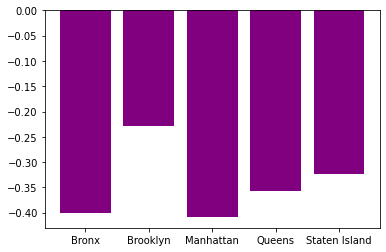

In [ ]:
bar_x_positions = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
plt.bar(bar_x_positions, axis_y, color="purple")

# Decision tree(wrong)

In [ ]:
# creating our X and y values
# we need to convert SCORE into integer
y = dataset["SCORE"].values.astype(int)
X = newdummies

In [ ]:
# divide into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

# training
tree = tree.fit(X_train, y_train)

# testing predictions
y_pred = tree.predict(X_test)

In [ ]:
print("Accuracy train:", tree.score(X_train, y_train))


Accuracy train: 0.1094836578581363


In [ ]:
print("Accuracy test:", tree.score(X_test, y_test))

Accuracy test: 0.10556328233657858


In [ ]:
y_test

array([12,  4, 13, ..., 50, 30, 11])